### Assignment 2
Submitted by: Devesh Maheshwari

#### About the data:
We have been given the skyscrappers data having about 2400 top buildings in United States. It lists the various other informtion related to the buidlings such as usage, build year etc. In this notebook, we are going to visualize this data and find some interesting insigths using seaborn. Let's look at the cities who have most skyscrappers for top ranks.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', 500)

In [2]:
sky = pd.read_csv('skyscrapers.csv')

### Skyscarpers by City

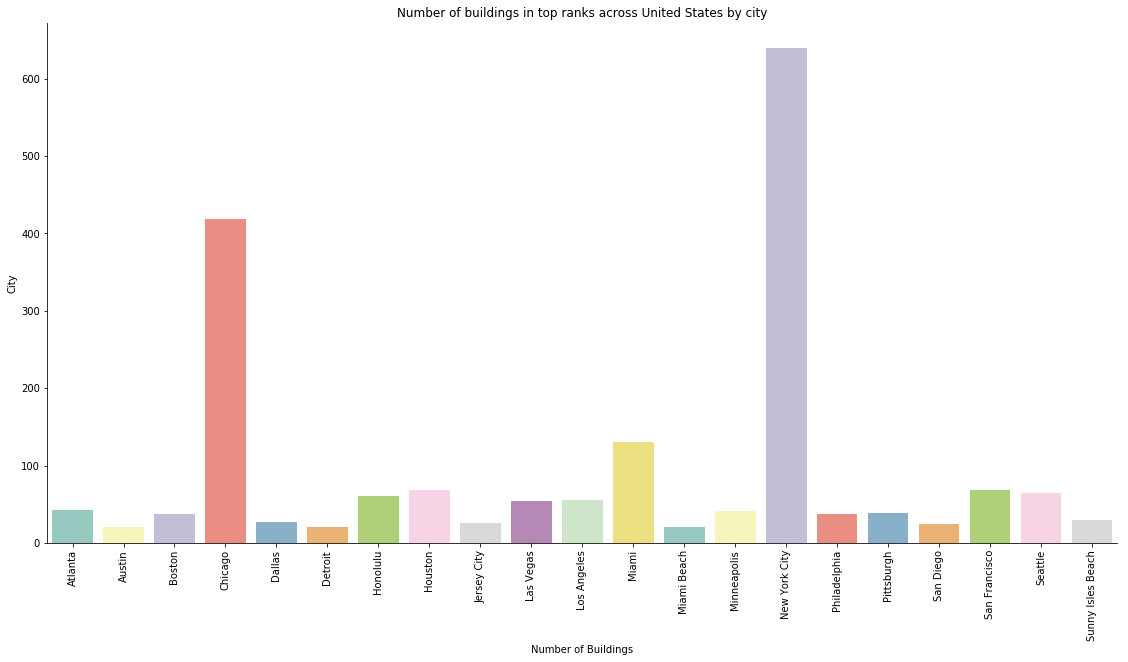

In [4]:
temp_sky = sky.groupby('city').agg('count').reset_index()[['city', 'city_id']].rename({'city_id':'count_in_city'}, axis='columns')
temp_sky=temp_sky[temp_sky.count_in_city>20]
g = sns.factorplot(x="city",y='count_in_city' ,data=temp_sky,size=8, kind='bar',aspect=2, palette="Set3")
g.set_xticklabels(rotation=90)
g.set(title='Number of buildings in top ranks across United States by city')
g.set_axis_labels(x_var='Number of Buildings', y_var='City')
plt.show()

#### Inference
The above plot suggest that Chicago and New York stands our in having the most skyscrappers in top ranks. And other cities include Miami, San Francisco, Houston, Seattle. While other cities may be having skyscrappers, but failed to get place in top 2500 skyscrappers.

Let's see the number of skyscrapper started by decade.


### Buidlings built by year

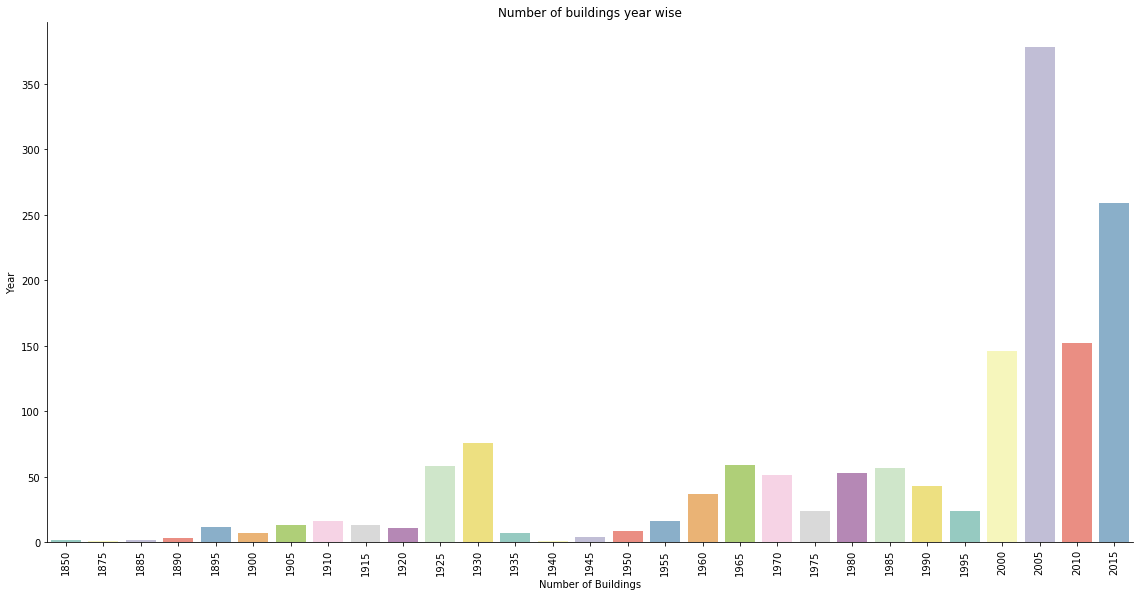

In [5]:
sky1 = sky.copy()
sky1['decade']=sky1['started.year'].apply(lambda x:5*round(x/5))
temp_sky = sky1[sky1['decade']>1800].groupby('decade').count().reset_index()[['decade','name']].rename({'name':'count_in_year'}, axis='columns')
g = sns.factorplot(x="decade",y='count_in_year' ,data=temp_sky,size=8, kind='bar',aspect=2, palette="Set3")
g.set(title='Number of buildings year wise')
g.set_axis_labels(x_var='Number of Buildings', y_var='Year')
g.set_xticklabels(rotation=90)

#### Inference
The above plot show a drastic reduction of skyscrapper projects between 1930-1960 and near 2010.
They reveal the impact of Great Depression(1930) and Great Recession(2009) on commissioning of skyscrapper projects. 

It is but natural that when economy is in recession, construction projects are kept on hold.

We do have building material information as well, let's see if there is any difference in the type of building materials used 

### Building by raw material

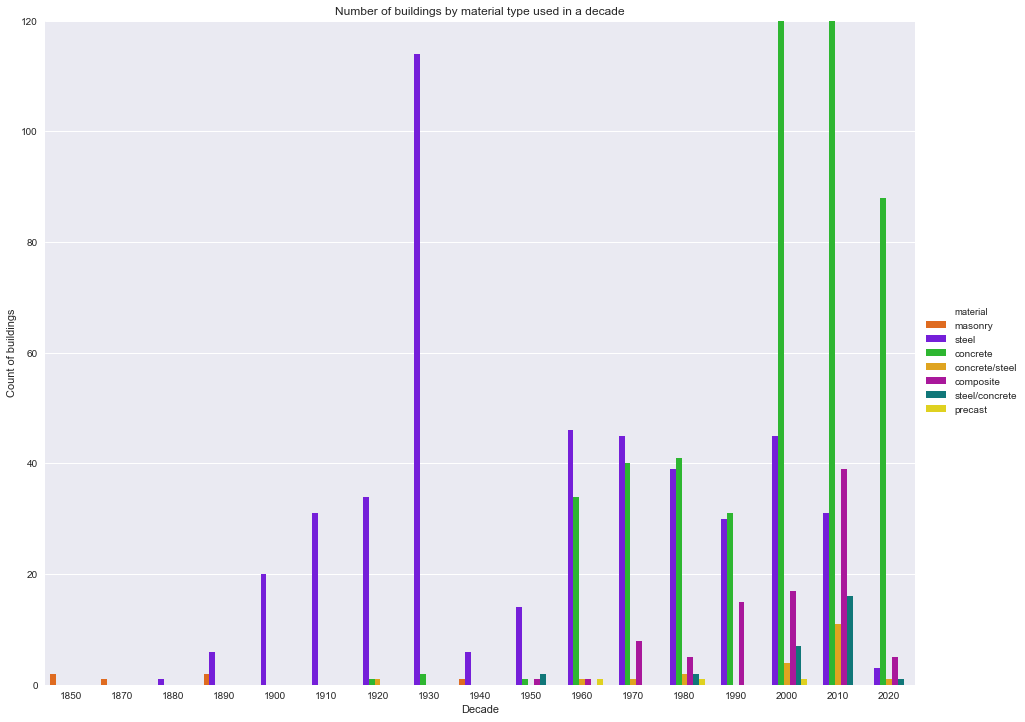

In [284]:
sky1 = sky.copy()
sky1['decade']=sky1['started.year'].apply(lambda x:10*round(x/10))
temp_sky = sky1[sky1['decade']>1800].groupby(['decade','material']).count().reset_index()[['decade','material','name']].rename({'name':'count_in_year'}, axis='columns')
g = sns.factorplot(x="decade",y='count_in_year' ,data=temp_sky,size=10, kind='bar',aspect=1.3, hue='material',palette='prism_r')
years = np.arange(1848, 2020)
g.set_xticklabels(step=1)
g.set(title='Number of buildings by material type used in a decade', ylim=(0,120))
g.set_axis_labels(x_var='Decade', y_var='Count of buildings')
plt.show()

#### Inference
The above plot suggests:
1. Initially the buildings were built by masonary material, which is bricks and stones and mortar.
2. By 1900, people started building using Steel material, which dominated till 1970. In this type, Steel Frames are used as primary construction with other material used in flooring and walls.
3. By 1970, Fazlur Rahman Khan invented the tube structure in building design, which could be build using the concrete efficiently and at lower cost. From them the dominance of steel in construction material ended. By 2000, most of the building were made using Concrete material.
4. From 2000, we are seeing the popularity of composite material, which could be future of skyscrappers. Example is San Francisco Museum of Modern Art. It reduces the weight and cost as well

Let's do a bit of more analysis on materials.

### Height of building by raw material

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


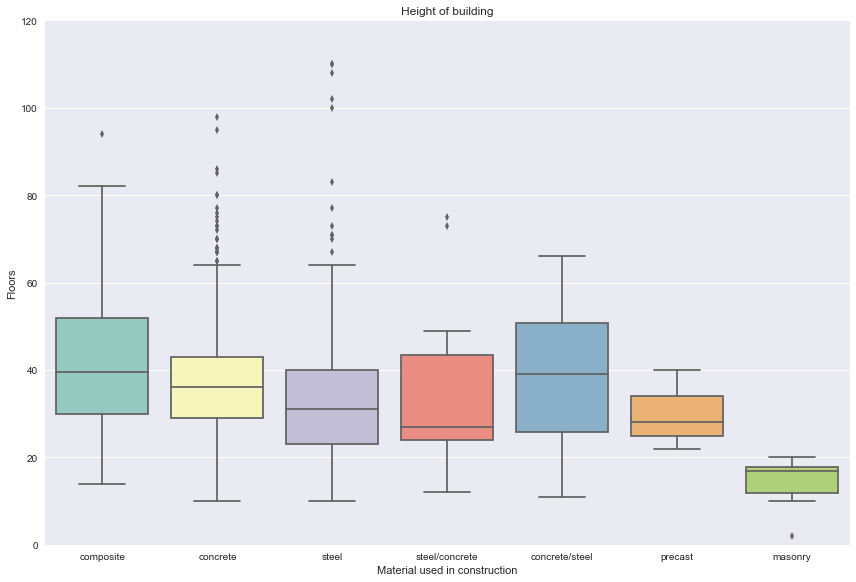

In [198]:
temp_sky = sky[sky['is completed']==True][sky['floors above']>0]
g = sns.factorplot(x="material",y='floors above' ,data=temp_sky ,palette="Set3",kind='box', size=8, aspect=1.5)
g.set(title='Height of building', ylim=(0,120),label='big')
g.set_xticklabels()
g.set_axis_labels(x_var='Material used in construction', y_var='Floors')
plt.show()

#### Inference
The above plot provides important reveletion of the type of material vs height of the building.
1. On average, masonary buildings have lesser height, reason could be the heavy nature of masonary materials which prohibit the taller buildings. This could be the reason of rejection of masonary material.
2. On the other hand, steel and concrete can scale to more heights. 

Let's look at the duration of construction with type of material.

### Construction time by raw material

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


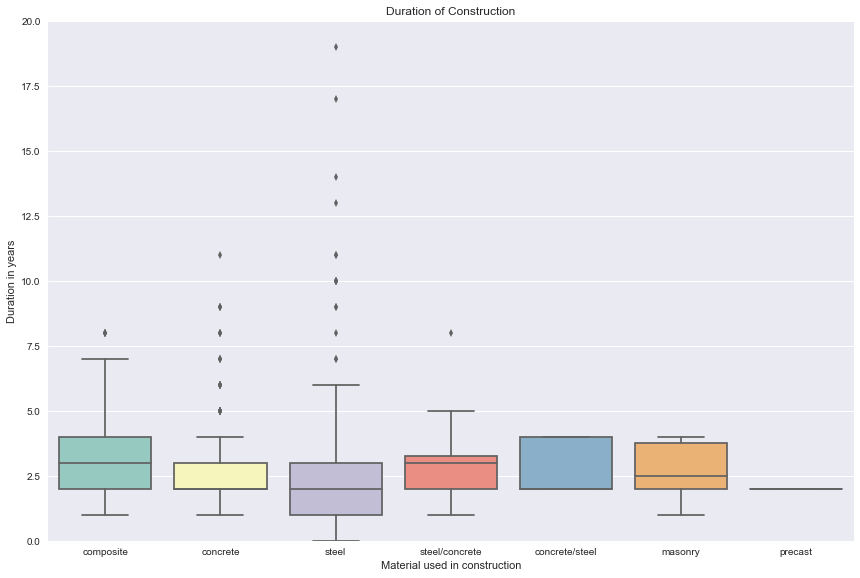

In [260]:
temp_sky = sky[sky['is completed']==True][sky['completed.year']>0][sky['started.year']>0].copy()
temp_sky['duration'] = temp_sky['completed.year']-temp_sky['started.year']
g = sns.factorplot(x="material",y='duration' ,data=temp_sky ,palette="Set3",kind='box', size=8, aspect=1.5)
g.set(title='Duration of Construction',label='big',ylim=(0,20))
g.set_xticklabels()
g.set_axis_labels(x_var='Material used in construction', y_var='Duration in years')
plt.show()

#### Inference
1. **Interestingly, precast buildings are built instantly, since they are precasted.**
2. On average, steel building are build faster than others(except precast). Since they use prebuild steel griders.

Let's now look at the how the construction time has varies with years.

### Construction time through years

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


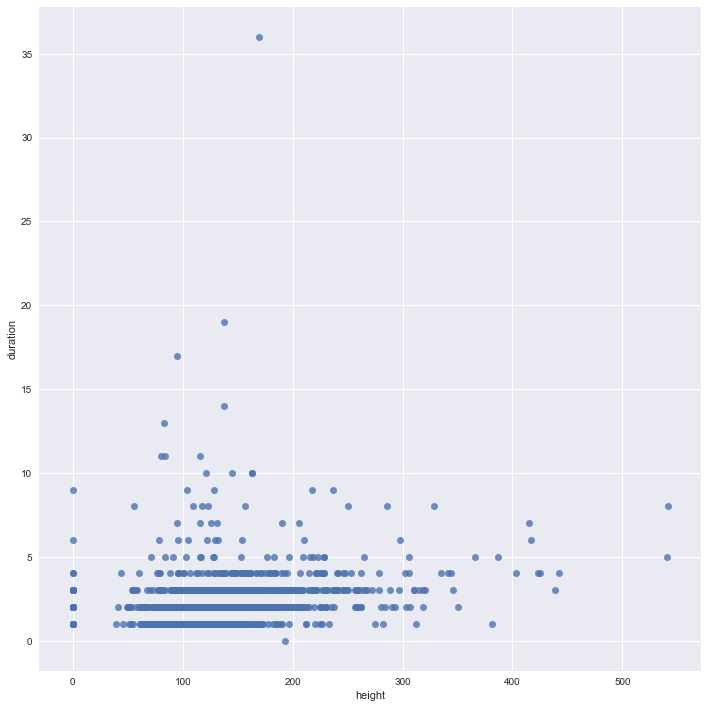

In [298]:
temp_sky = sky[sky['is completed']==True][sky['completed.year']>0][sky['started.year']>0].copy()
temp_sky['duration'] = temp_sky['completed.year']-temp_sky['started.year']
sns.lmplot(x="height",y='duration' ,data=temp_sky ,fit_reg=False, size=10)

#### Inference
The above plot shows interesting observation, that the duration of project is not much correlated with the height. It means other factors and not just the height alone contribute to project length. Those factors could be budget and type of building. 

### Construction duration through years and height

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


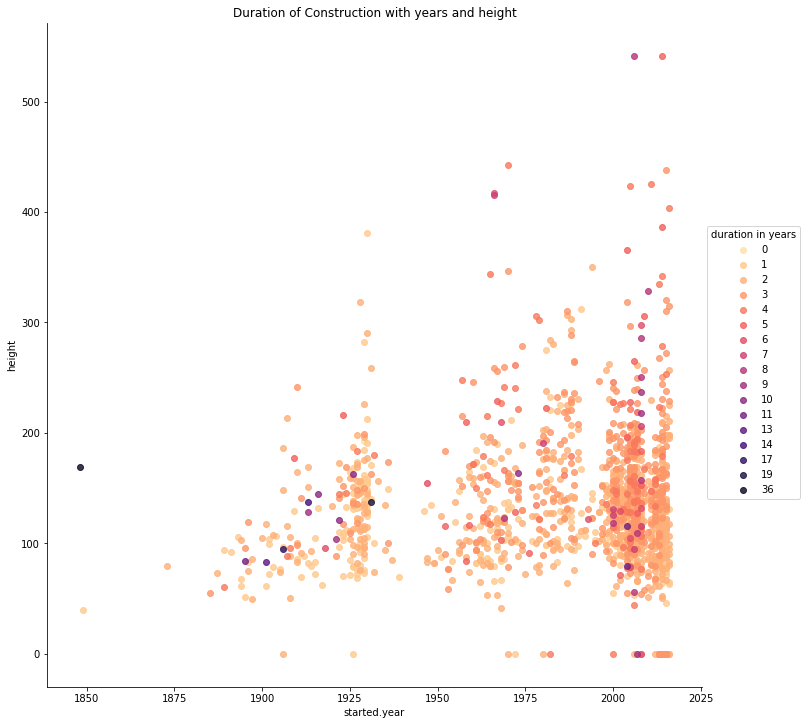

In [9]:
temp_sky = sky[sky['is completed']==True][sky['completed.year']>0][sky['started.year']>0].copy()
temp_sky['decade']=temp_sky['started.year'].apply(lambda x:10*round(x/10))
temp_sky['duration in years'] = temp_sky['completed.year']-temp_sky['started.year']
g = sns.lmplot(x="started.year",y='height' ,data=temp_sky , palette='magma_r',fit_reg=False, hue="duration in years",size=10)
g.set(title='Duration of Construction with years and height')
plt.show()

#### Inference
This plot shows that the time required to build has not varied with advances in technology as well.

**Some buildings took more time to complete in the era of Great Recession, seems that those projects were put on hold.**

Also the plot shows that taller buildings have started building in near past only. And with time, the there are more taller buildings. The lesser density around 1930 are due to Great Depression and possibly due to WW2.
Let's look at this with time as well.

Let's see the variation of height in skyscrappers for cities.

### Buildings with current status

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in version 2.0. Use nipy_spectral and nipy_spectral_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


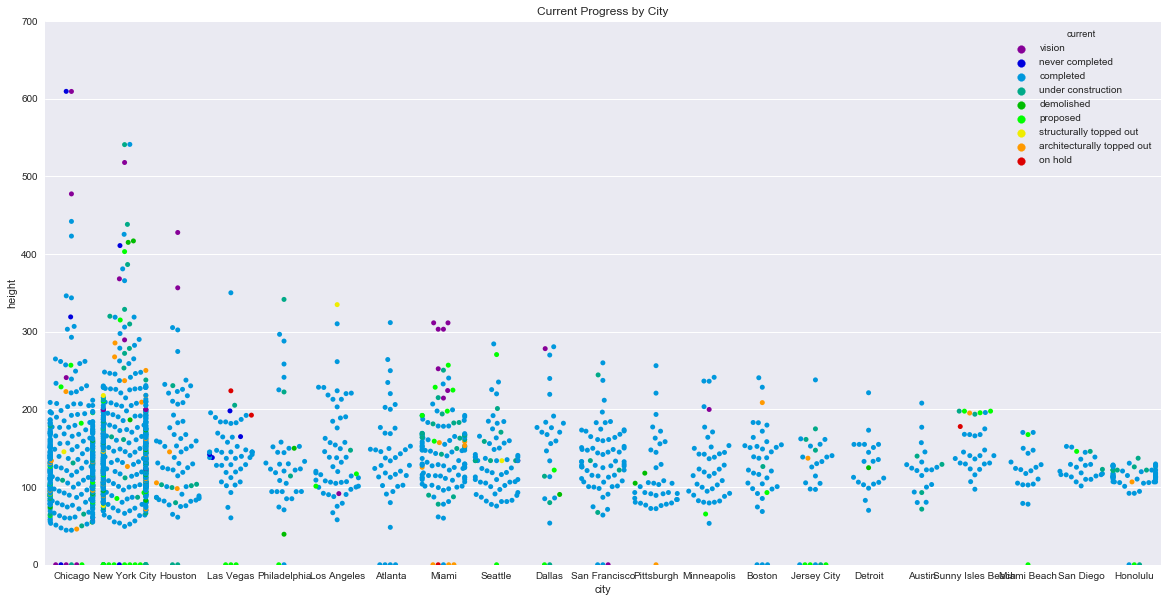

In [360]:
temp_sky = sky.groupby('city').agg('count').reset_index()[['city', 'city_id']].rename({'city_id':'count_in_city'}, axis='columns')
temp_sky=temp_sky[temp_sky.count_in_city>20]
cities = set(temp_sky.city)
temp_sky2 = sky.copy()
temp_sky2=temp_sky2[temp_sky2['city'].isin(cities)]
sns.set(rc={'figure.figsize':(20,10)})
g = sns.swarmplot(x="city", y="height", hue="current", data=temp_sky2, size=5,palette='spectral')
g.set(title='Current Progress by City',ylim=(0,700))
plt.figsize=(25, 15)
plt.show()

#### Inference
The above plot reiterate some of the conclusions we made earlier and also highlight the following:
1. New proposed projects are currently in New York, Chicago,Jersey City, Sunny Isles Beach, Miami and Las Vegas.
2. Most Vision projects are of height >300. While the porposed ones are having diverse set of heights.
3. **Cities such as Detroit, San Francisco, Philadelphia, Pittsburgh are not having any new projects. Apparently Detroit is not economically booming and there is issue of Land space in San Francisco.**

Let's analyse these facts more clearly.

### Upcoming projects in cities

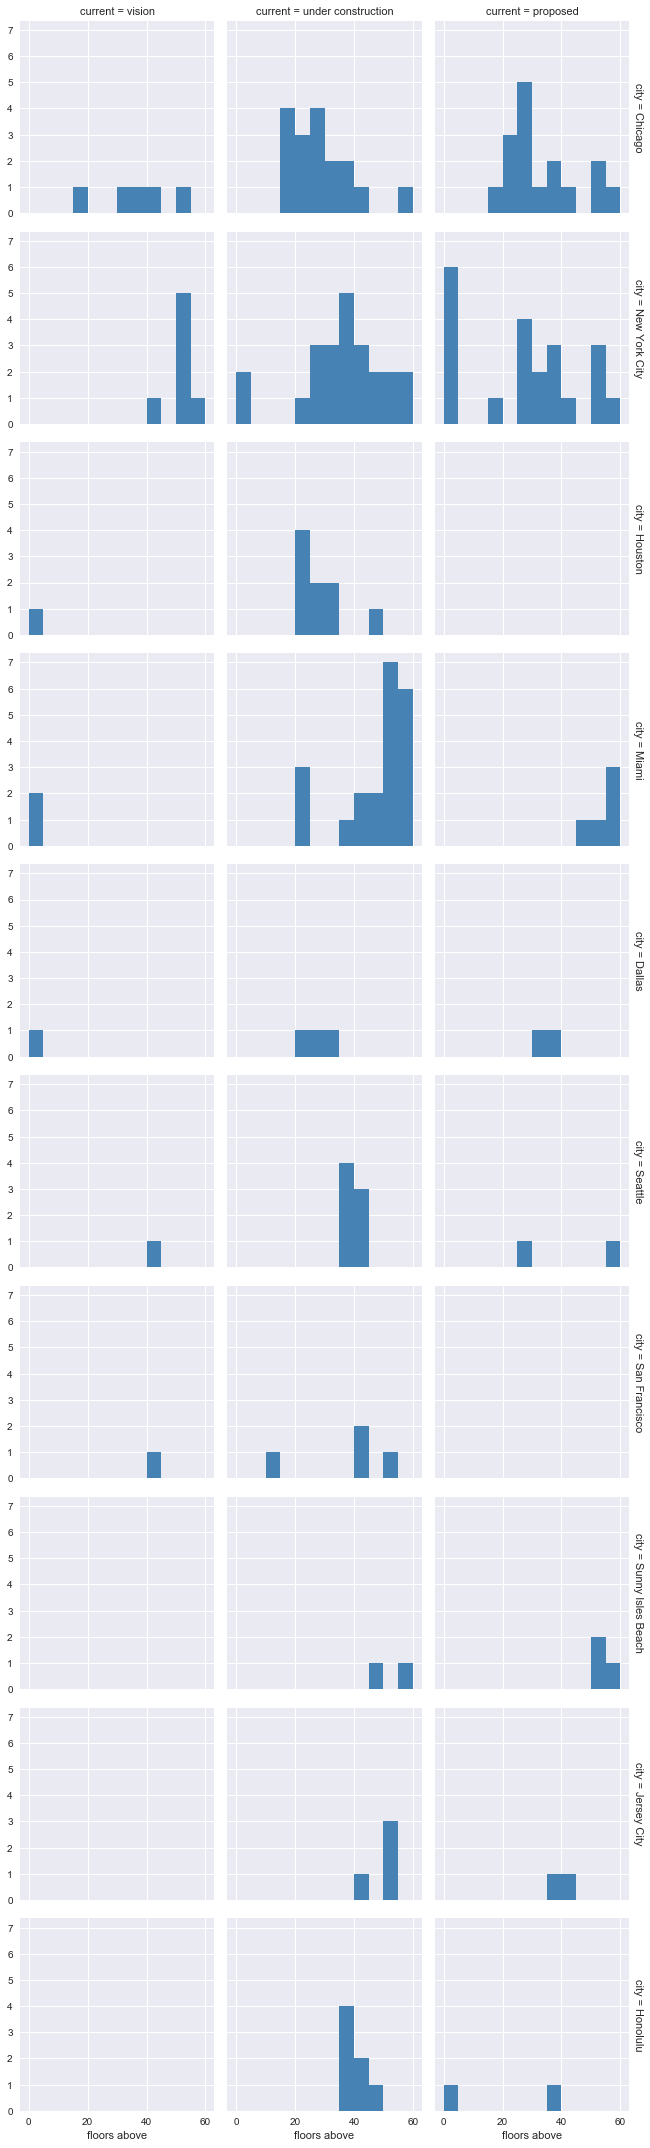

In [428]:
ab=sky.groupby(['city','current']).count().reset_index()[['city','current','name']].rename({'name':'stage_in_city'}, axis='columns')
abc = ab[ab.current.isin(['vision','proposed','under construction'])]
abcd = abc.groupby('city').agg('sum').reset_index()
cities = abcd[abcd.stage_in_city>4].city.unique()
temp_sky2 = sky.copy()
temp_sky2 = temp_sky2[temp_sky2['current'].isin(['vision', 'proposed','under construction'])]
temp_sky2=temp_sky2[temp_sky2['city'].isin(cities)]
g = g = sns.FacetGrid(temp_sky2, row="city", col="current", margin_titles=True,palette='spectral')
g.map(plt.hist, "floors above", color="steelblue", bins=bins, lw=0)
plt.show()

The above plot suggest the following:
1. People are visioning more about Chicago and New York than any other city. It shows that economy for these cities are booming will keep booming in coming future in the minds of Builders.
2. Houston and Miami are next in current construction
3. **Seattle and Dallas are also getting a number of project proposals, which means they are also doing better in terms of economic activity. One should try to find jobs in those cities.**
4. Sunny Isles Beach is actually a tourist destination in Florida and most of the existing and upcoming buildings are hotels. It is a good place in winter.